In [165]:
#Import Libraries

import requests
import json
import pandas as pd
import openpyxl
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
#A dictionary of required HTTP headers to send to the API's specified url.
headers = {'Content-type': 'application/json'}

In [5]:
#Authentication key from BLS via 'https://data.bls.gov/registrationEngine/'
rkey = ("331efe7967c44039b40c36334f2014de")

In [49]:
#API specified payload and post

payload = json.dumps({"seriesid":["CEU4142343003", "CEU4142343008", "CEU0800000003", "CEU0800000008"], "startyear":"2019", "endyear":"2022",
"catalog":False, "calculations":False, "annualaverage":False,"aspects":False,
"registrationkey":rkey}) 

f = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=payload, headers=headers)

In [146]:
#Creating variable from requests as a dict, verifying dict

json_data = json.loads(f.text)
print(type(json_data))

<class 'dict'>


In [147]:
#parsing dict into seperate series and setting to variable
seriesID_0 = json_data['Results']['series'][0]
seriesID_1 = json_data['Results']['series'][1]
seriesID_2 = json_data['Results']['series'][2]
seriesID_3 = json_data['Results']['series'][3]

#seriesID_0 is CEU4142343003 - Computer and software AVERAGE HOURLY EARNINGS OF ALL EMPLOYEES
#seriesID_1 is CEU4142343008 - Computer and software
#seriesID_2 is CEU0800000003 - Total nonfarm AVERAGE HOURLY EARNINGS OF ALL EMPLOYEES
#seriesID_3 is CEU0800000008 - Total nonfarm AVERAGE HOURLY EARNINGS OF PRODUCTION AND NONSUPERVISORY EMPLOYEES

In [152]:
#verifying correct information in variable
print(seriesID_0)

{'seriesID': 'CEU4142343003', 'data': [{'year': '2022', 'period': 'M12', 'periodName': 'December', 'value': '51.17', 'footnotes': [{'code': 'P', 'text': 'preliminary'}]}, {'year': '2022', 'period': 'M11', 'periodName': 'November', 'value': '49.72', 'footnotes': [{}]}, {'year': '2022', 'period': 'M10', 'periodName': 'October', 'value': '50.64', 'footnotes': [{}]}, {'year': '2022', 'period': 'M09', 'periodName': 'September', 'value': '47.41', 'footnotes': [{}]}, {'year': '2022', 'period': 'M08', 'periodName': 'August', 'value': '47.48', 'footnotes': [{}]}, {'year': '2022', 'period': 'M07', 'periodName': 'July', 'value': '48.83', 'footnotes': [{}]}, {'year': '2022', 'period': 'M06', 'periodName': 'June', 'value': '47.06', 'footnotes': [{}]}, {'year': '2022', 'period': 'M05', 'periodName': 'May', 'value': '47.14', 'footnotes': [{}]}, {'year': '2022', 'period': 'M04', 'periodName': 'April', 'value': '47.34', 'footnotes': [{}]}, {'year': '2022', 'period': 'M03', 'periodName': 'March', 'value

In [167]:
#Creating DF from series
#changing data type and joining columns
#dropping columns
#changing data type of column
df_0 = pd.DataFrame(seriesID_0['data'])
df_0['date'] = df_0['year'].astype(str) + "-" + df_0['periodName']
df_0 = df_0.drop(['period', 'footnotes'], axis = 1)
df_0['value'] = df_0['value'].astype(float)

In [155]:
#Creating DF from series
#changing data type and joining columns
#dropping columns
#changing data type of column
df_1 = pd.DataFrame(seriesID_1['data'])
df_1['date'] = df_1['year'].astype(str) + "-" + df_1['periodName']
df_1 = df_1.drop(['period', 'footnotes'], axis = 1)
df_1['value'] = df_1['value'].astype(float)

In [156]:
#Creating DF from series
#changing data type and joining columns
#dropping columns
#changing data type of column
df_2 = pd.DataFrame(seriesID_2['data'])
df_2['date'] = df_2['year'].astype(str) + "-" + df_2['periodName']
df_2 = df_2.drop(['period', 'footnotes'], axis = 1)
df_2['value'] = df_2['value'].astype(float)
df_2 = df_2.drop(0)

In [157]:
#Creating DF from series
#changing data type and joining columns
#dropping columns
#changing data type of column
df_3 = pd.DataFrame(seriesID_3['data'])
df_3['date'] = df_3['year'].astype(str) + "-" + df_3['periodName']
df_3 = df_3.drop(['period', 'footnotes'], axis = 1)
df_3['value'] = df_3['value'].astype(float)
df_3 = df_3.drop(0)

In [164]:
#Creating Excel workbook with a sheet for each series
with pd.ExcelWriter("BLS_Report.xlsx") as writer:
    df_0.to_excel(writer, sheet_name="CEU4142343003", index=False)
    df_1.to_excel(writer, sheet_name="CEU4142343008", index=False)
    df_2.to_excel(writer, sheet_name="CEU0800000003", index=False)
    df_3.to_excel(writer, sheet_name="CEU0800000008", index=False)

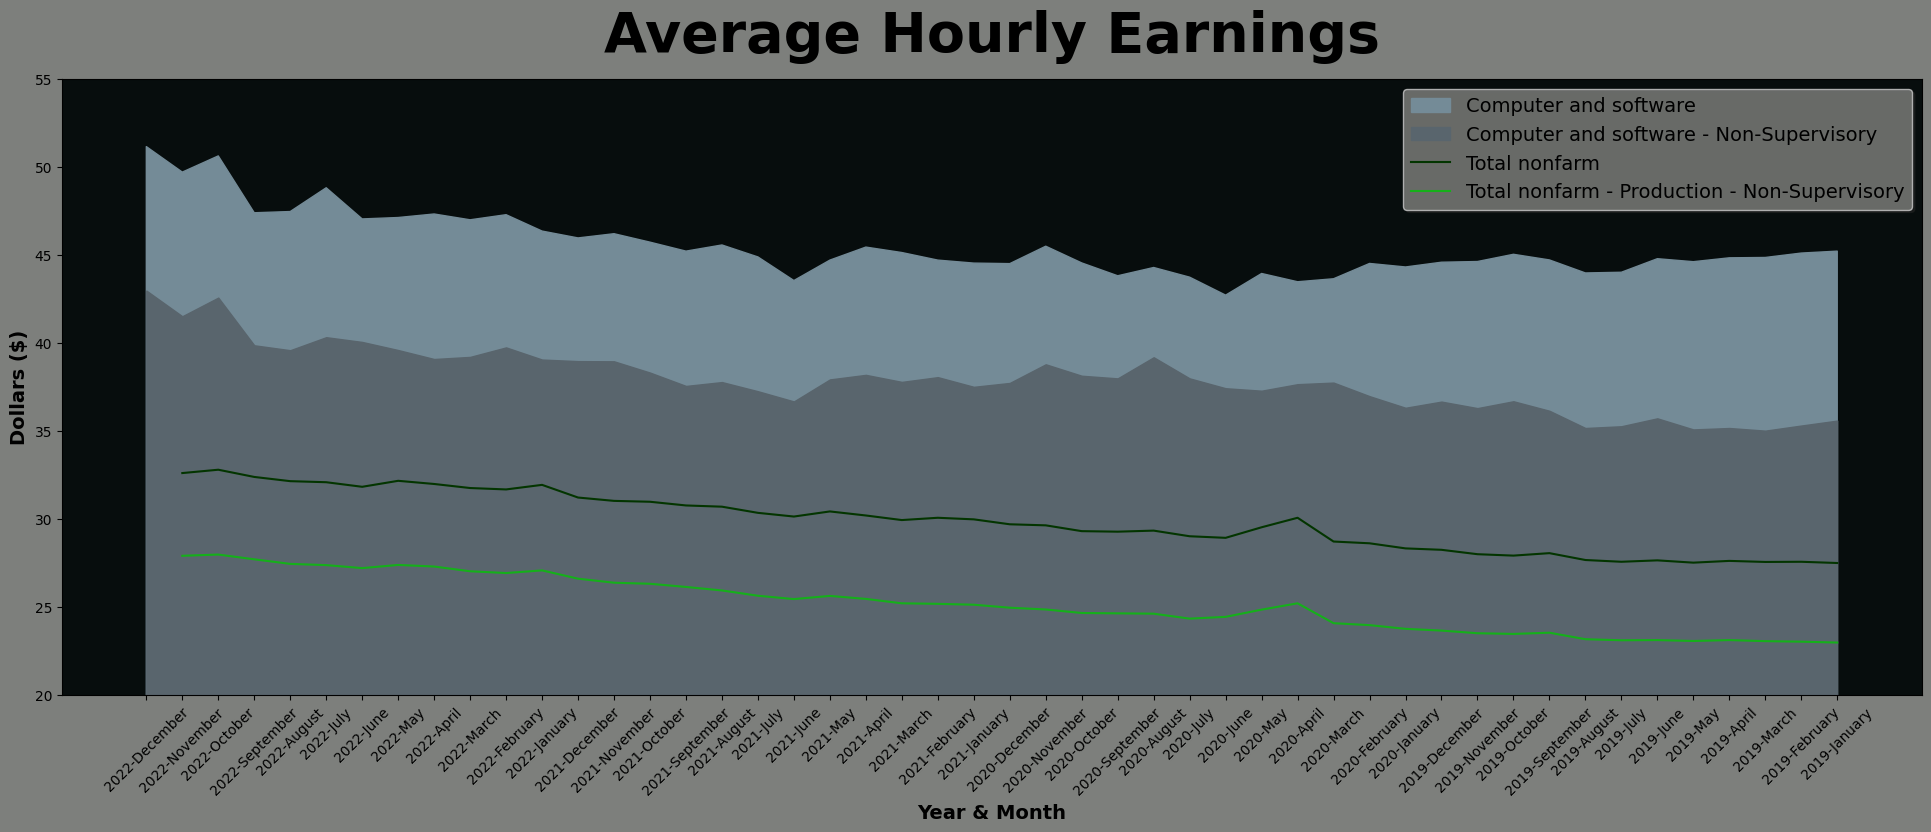

In [166]:
#changing parameters of the plot
#stack plot with two line plots on top
#changing plot parts


plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.titleweight'] = 700
plt.rcParams['axes.labelweight'] = 700
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.facecolor'] = '#7d7f7c'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.shadow'] = True
plt.rcParams['axes.facecolor'] = '#070d0d'
plt.figure(figsize = (24, 8), facecolor= '#7d7f7c')
label1 = ['Computer and software']
label2 =['Computer and software - Non-Supervisory']
plt.stackplot(df_0.loc[:,'date'], df_0.loc[:,'value'],color = '#748b97', labels = label1)
plt.stackplot(df_1.loc[:,'date'], df_1.loc[:,'value'],color = '#59656d', labels = label2)
plt.plot(df_2.loc[:,'date'],df_2.loc[:,'value'],color = '#033500', label = "Total nonfarm")
plt.plot(df_3.loc[:,'date'],df_3.loc[:,'value'],color = '#15b01a', label = "Total nonfarm - Production - Non-Supervisory")
plt.xticks(rotation = 45)
plt.xlabel('Year & Month')
plt.ylabel('Dollars ($)')
plt.title('Average Hourly Earnings')
plt.ylim(20, 55)
plt.legend()